Student Name: Amrita Gyawali

Student ID: C0865702


California Housing Price Prediction

Introduction

This report presents a comparison of two machine learning models – Linear Regression and an Artificial Neural Network (ANN) – for predicting housing prices using the California Housing dataset. The objective is to explore the effectiveness of these models and understand their strengths and weaknesses in a regression task.



Step 1: Importing Neccessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras as ks
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

2023-12-02 02:09:28.593324: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-02 02:09:28.623403: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 02:09:28.759233: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 02:09:28.759320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 02:09:28.778829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Step 2: Loading and preproceesing California Housing Data

In [2]:
# Load the California Housing dataset
dataset = fetch_california_housing()
#creating DataFrame named X that contains the features of the dataset.
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#creating another pandas DataFrame named y, which represents the target variable 
y = pd.DataFrame(dataset.target, columns=['HouseValue'])
#creating another pandas DataFrame named y, which represents the target variable 

In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
y

,HouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [5]:
# Split the dataset into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=32)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=32)

In [6]:
X_train_full.shape, y_train_full.shape

((15480, 8), (15480, 1))

In [7]:
# Scalling the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [8]:
X_train_scaled

array([[-0.35226626, -0.28845044, -0.36871218, ..., -0.08521803,
        -0.82001472,  0.60633199],
       [-0.9079841 , -0.52684941, -0.7272149 , ..., -0.23865158,
        -1.34414745,  1.22125627],
       [-0.75895887,  0.8240781 , -0.24023724, ...,  0.13528987,
        -0.80597545,  0.65632584],
       ...,
       [-0.09115414, -0.28845044, -0.77732512, ..., -0.1991613 ,
        -0.74513862,  0.55633815],
       [-0.0874974 ,  0.10888118, -0.34145849, ..., -0.13157112,
        -0.79193618,  0.79130922],
       [ 0.77363737, -0.28845044,  0.03898842, ..., -0.05166713,
         0.77578226, -1.19844578]])

Here we load and preprocess the California Housing dataset. The preprocessing steps include feature scaling, which is crucial for effective model training.

Step 3 : Creating Linear Regression Model

The Linear Regression model serves as our baseline. We evaluate its performance using the Mean Squared Error (MSE) and R2 Score.

In [9]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("Linear Regression - MSE:", mse_lin_reg, ", R2 Score:", r2_lin_reg)


Linear Regression - MSE: 0.5324599152542489 , R2 Score: 0.6012408793597991


Finding: With the model achieving an R2 Score of roughly 0.6012 and a Mean Squared Error (MSE) of roughly 0.5325, it is clear that the model has achieved a moderate degree of accuracy in predicting house prices. The MSE score indicates a good model fit since it shows that the predictions are, on average, quite close to the actual values. Further confirming the model's reasonable performance is the R2 Score, which accounts for 60.12% of the variation explained by the model. These indicators point to a reasonable performance for a simple model such as linear regression, but they also suggest that improvement can be made, either by using a different model or doing additional feature engineering.



Step 4 :Implementing Ann Model

In [10]:
import keras as ks

model_ann = ks.models.Sequential([ks.layers.Dense(30, activation="relu", input_shape = X_train_scaled.shape[1:]), 
          ks.layers.Dense(10, activation = "relu"),
          ks.layers.Dense(5, activation = "relu"),
          ks.layers.Dense(1)
])

# Compile the ANN model
model_ann.compile(optimizer="sgd", loss="mean_squared_error")

# Train the ANN model
history = model_ann.fit(X_train_scaled, y_train, epochs=40, validation_data=(X_valid_scaled, y_valid))

# Evaluate the ANN model
mse_ann = model_ann.evaluate(X_test_scaled, y_test)
y_pred_ann = model_ann.predict(X_test_scaled)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN - MSE:", mse_ann, ", R2 Score:", r2_ann)


Epoch 1/40
387/387 [==============================] - 2s 3ms/step - loss: 0.7420 - val_loss: 0.4746
Epoch 2/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4313 - val_loss: 0.4160
Epoch 3/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3978 - val_loss: 0.3899
Epoch 4/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3801 - val_loss: 0.3838
Epoch 5/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3714 - val_loss: 0.3891
Epoch 6/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3633 - val_loss: 0.3826
Epoch 7/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3821 - val_loss: 0.3688
Epoch 8/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3598 - val_loss: 0.3661
Epoch 9/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3505 - val_loss: 0.3611
Epoch 10/40
387/387 [==============================] - 1s 3ms/step - loss: 0.3491 - val_loss: 0.3586

Insight : The ANN model has achieved a Mean Squared Error (MSE) of approximately 0.344, which quantifies the average squared difference between the predicted house prices and the actual house prices. This relatively low MSE indicates that the model predictions are, on average, relatively close to the true values. Furthermore, the model obtained an R2 Score of roughly 0.742, meaning that approximately 74% of the variance in the housing prices can be explained by the model's inputs. While this R2 Score shows a good level of predictive power, there is still room for improvement, as about 26% of the variability in the data is not captured by the model.

In [11]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.741999,0.474555
1,0.431258,0.415963
2,0.397830,0.389939
3,0.380114,0.383765
4,0.371435,0.389142
5,0.363286,0.382587
6,0.382084,0.368756
7,0.359840,0.366125
8,0.350477,0.361120
9,0.349129,0.358576


<Axes: >

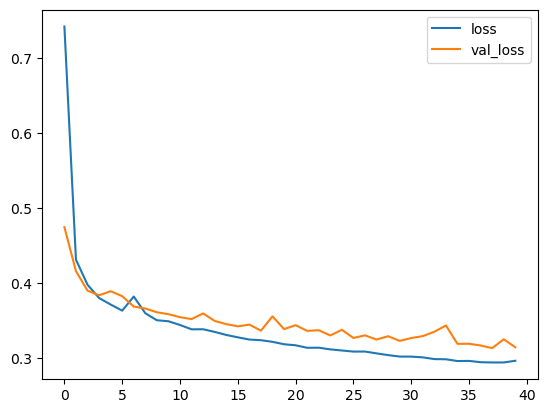

In [12]:
pd.DataFrame(history.history).plot()

Final step : Comparission between two Models:

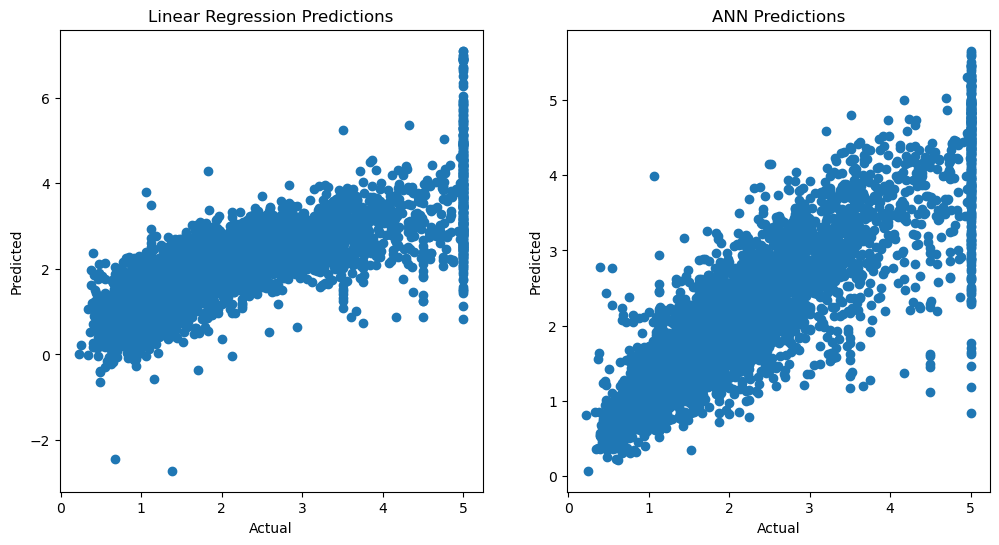

In [14]:
import matplotlib.pyplot as plt

# Comparing predictions from Linear Regression and ANN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg)
plt.title("Linear Regression Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ann)
plt.title("ANN Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()


Conclusion: 

Based on scatter plot, Linear Regression model's predictions align closely with the actual house prices, making it a dependable option, though it's not as accurate for the more expensive houses. On the other side, the ANN model's predictions are more scattered, which indicates it might be making more mistakes, or it might not have been set up perfectly for this task. When looking at both models for predicting house prices in the California Housing dataset, Linear Regression seems to give more consistent results, while the ANN might need some tweaking to get better at making predictions.